# CTA Assignment: Class Data
Ben Shapley | 24/10/2024

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "Data/ClassData.csv"
my_class = pd.read_csv(path)

### Class Reference

In [105]:
# Visual Reference
display(my_class)

,timestamp,unreal_feelings,unreal_favourite,coding_languages,lucky_number,music_genre,object_choice,object_reason
0,2024/10/17 12:59:01 pm CET,Confident,World Building,I am new to coding!!,3,Rap/HipHop,Dog Toy,i can play with doggo
1,2024/10/17 1:01:24 pm CET,I am lost (help),World Building,C++;JavaScript,0,R&b,Laptop,Idk
2,2024/10/17 1:01:57 pm CET,I am lost (help),Blueprints,"Python;C++;JavaScript;HTML, CSS, CircuitPython",7,Reggaetón,Suitcase,I am always carrying loads
3,2024/10/17 1:03:52 pm CET,Im having fun,Looking at the marketplace,I am new to coding!!,52,Pop,Bread,It smells good!
4,2024/10/17 1:06:52 pm CET,Im having fun,World Building,C#;C++,7,Jazz/Blues,Bread,yummy bread
5,2024/10/17 1:09:54 pm CET,Im having fun,Blueprints,Python,3,Rock/Metal,Laptop,smart
6,2024/10/17 1:23:11 pm CET,Im having fun,World Building,I am new to coding!!,7,Electronic,Dog Toy,Because it's cute
7,2024/10/17 1:27:06 pm CET,Im having fun,Blueprints,JavaScript,12,Lofi,Table,stable
8,2024/10/17 1:29:10 pm CET,Im having fun,World Building,I am new to coding!!,3,Pop,Laptop,i spend too much time looking at one
9,2024/10/17 1:32:55 pm CET,Im having fun,Blueprints,I am new to coding!!,36,Electronic,Table,tables are dope


### Find the luckiest number in the data column

In [106]:
# Simple max function to find highest lucky number
print(f"The highest lucky number is", int(my_class.lucky_number.max()))

The highest lucky number is 52


### How many people are enjoying Unreal and what they like (with amount)

In [107]:
from collections import Counter

# Filter to everyone enjoying Unreal
unreal_enjoyers = my_class[[enjoy for enjoy in my_class.unreal_feelings == "Im having fun"]]

# Find what they enjoy about Unreal
unreal_fav = unreal_enjoyers.unreal_favourite

# Get the 3 most common answers
unreal_fav_common = Counter(unreal_fav).most_common(3)
print(unreal_fav_common)

# Convert these to a string with indexing
unreal_fav_str = "".join(f"{fun[0]} ({fun[1]}x people), " for fun in unreal_fav_common)

print(f"{len(unreal_lovers)} people are having fun with Unreal Engine at the moment! These people are really enjoying: {unreal_fav_str}")

[('Blueprints', 5), ('World Building', 3), ('Looking at the marketplace', 2)]
11 people are having fun with Unreal Engine at the moment! These people are really enjoying: Blueprints (5x people), World Building (3x people), Looking at the marketplace (2x people), 


### Areas of Unreal people commonly enjoy (Graph)

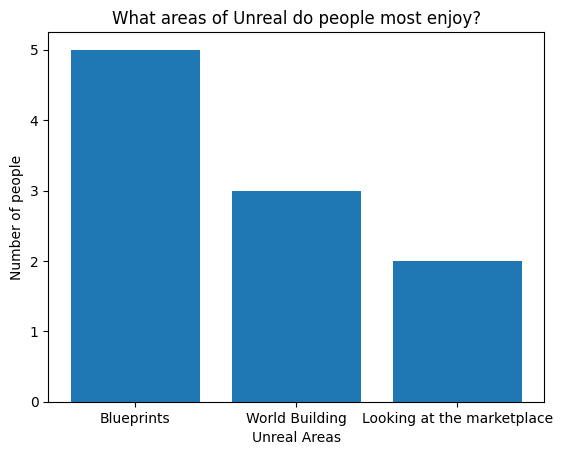

In [108]:
# Get the amount of people that like each category
# Converting to int just in case
unreal_numbers = [int(x[1]) for x in unreal_fav_common]
    ##[for x in unreal_numbers:
    ##    print(x)

# Doing the same but getting the string at index 0
unreal_str = [str(x[0]) for x in unreal_fav_common]

# Creating a Data Frame
data = pd.DataFrame({
    'Strings': unreal_str,
    'Numbers': unreal_numbers
})

# Plotting the X & Y
plt.bar(data['Strings'], data['Numbers'])
plt.xlabel('Unreal Areas')
plt.ylabel('Number of people')
plt.title('What areas of Unreal do people most enjoy?')
plt.show()

### Most people enjoying Unreal are new to Coding

In [109]:
# Filtering to coding languages data
coding_exp = unreal_lovers.coding_languages

# Get the most common result
coding_exp_common = Counter(coding_exp).most_common(1)

# Convert to a string to see what coding experience the people who are enjoying UE have
coding_exp_common_str = "".join(f"Most people enjoying Unreal said they were '{lang[0][5:18]}' ({lang[1]}x people)," for lang in coding_exp_common)
print(coding_exp_common_str)

Most people enjoying Unreal said they were 'new to coding' (6x people),


### Median Lucky Number of the class (Graph)

The median lucky number of the class is 7.0


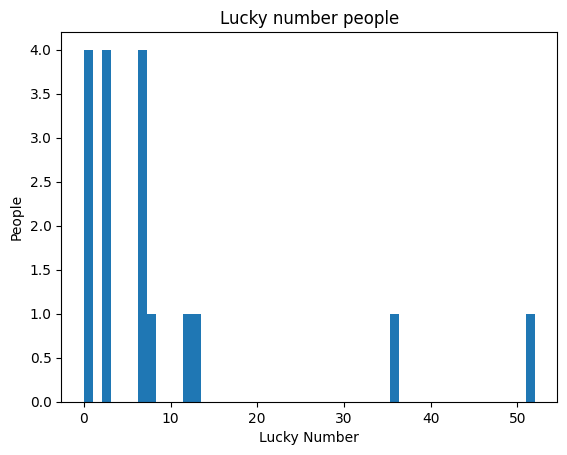

In [110]:
# Creating a Histogram representing the lucky numbers data
plt.hist(my_class.lucky_number, bins=50)
plt.xlabel('Lucky Number')
plt.ylabel('People')
plt.title('Lucky number people')

# Find & print the median of these numbers
median_lucky_no = my_class.lucky_number.median()
print(f"The median lucky number of the class is {median_lucky_no}")

### Highest Lucky Number & Desire Relation

In [111]:
# Simple variable for the highest lucky no.
highest_no = max(my_class.lucky_number)

# Find the person's data that chose this number
highest_no_person = my_class[my_class["lucky_number"]==highest_no]

# Print the number & a what object they would like to be
print(f"The highest lucky number is {highest_no} and they really want to be {highest_no_person["object_choice"].item().lower()} because '{highest_no_person["object_reason"].item().lower()}'.")

The highest lucky number is 52 and they really want to be bread because 'it smells good!'.


### People with 0 as Lucky Number & Desire Relation

In [112]:
# Same as above but with the 3 lowest numbers
lowest_no = min(my_class.lucky_number)
lowest_no_person = my_class[my_class["lucky_number"]==lowest_no]

for index, row in lowest_no_person.iterrows():
    ##print(row)
    print(f"The lowest lucky number is {lowest_no} and this person really want to be a {row['object_choice'].lower()} because '{row['object_reason'].lower()}'.")

The lowest lucky number is 0 and this person really want to be a laptop because 'idk'.
The lowest lucky number is 0 and this person really want to be a dog toy because 'i love dogs'.
The lowest lucky number is 0 and this person really want to be a laptop because 'i can come alive '.
